In [1]:
# Based on https://firedynamics.github.io/LectureFireSimulation/content/tools/03_analysis/02_fdsreader.html

In [2]:
# use ths command to install  : !python.exe -m pip install fdsreader==1.10.2

In [3]:
import matplotlib.pyplot as plt
import fdsreader as fds

In [4]:
# define the path to the data
path_to_data = 'house2'
sim = fds.Simulation(path_to_data)

In [5]:
# print available slice data
for slice in sim.slices:
    print(f"Slice Type [2D/3D]: {slice.type}\n  Quantity: {slice.quantity.name}\n", 
          f" Physical Extent: {slice.extent}\n  Orientation [1/2/3]: {slice.orientation}\n")

Slice Type [2D/3D]: 2D
  Quantity: TEMPERATURE
  Physical Extent: Extent([0.00, 43.00] x [0.00, 36.00] x [1.00, 1.00])
  Orientation [1/2/3]: 3



In [6]:
# Get the temperature slice
w_slice = sim.slices.filter_by_quantity("TEMPERATURE")
print(w_slice)

SliceCollection([Slice([2D] quantity=Quantity('TEMPERATURE'), cell_centered=False, extent=Extent([0.00, 43.00] x [0.00, 36.00] x [1.00, 1.00]), extent_dirs=('x', 'y'), orientation=3)])


In [7]:
# choose the temperature slice in y-direction
slc = w_slice.get_nearest(x=0,y=0)
print(slc)

Slice([2D] quantity=Quantity('TEMPERATURE'), cell_centered=False, extent=Extent([0.00, 43.00] x [0.00, 36.00] x [1.00, 1.00]), extent_dirs=('x', 'y'), orientation=3)


In [8]:
t0=slc.get_nearest_timestep(0)

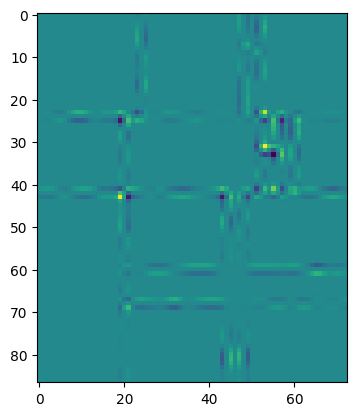

In [9]:
plt.imshow(slc[0].data[slc.get_nearest_timestep(3)])

In [10]:
# size of array is 15 x 15, ie one point every 0.5m 
slc[0].data[slc.get_nearest_timestep(3)].shape

(87, 73)

In [11]:
type(slc[0].data[slc.get_nearest_timestep(3)])

numpy.ndarray

In [12]:
print(slc[0].data.shape)

f = open(path_to_data + ".txt", "a")
for i in range(3):
    f.write(slc[0].data.shape[i].__str__() + ", ")
    print(slc[0].data.shape[i])
f.write("\n")
f.write(int(list(slice.extent)[1][1]).__str__() + ", " + int(list(slice.extent)[2][1]).__str__() + "\n")

for i in range(slc.times.shape[0]):
    f.write(slc.times[i].__str__() + ", ")
f.write("\n")
for i in range(slc[0].data.shape[0]):
    snapshot = slc[0].data[slc.get_nearest_timestep(slc.times[i])].flatten()
    for j in range(snapshot.shape[0]):
        f.write(snapshot[j].__str__())
        f.write(", ")
    f.write("\n")
f.close()

(997, 87, 73)
997
87
73
